In [1]:
# Import main packages 
from tilepy.include.ObservationScheduler import GetSchedule
from tilepy.include.PointingTools import ObservationParameters, NextWindowTools, getdate
import time
import argparse
import os
from pathlib import Path


/opt/miniconda3/envs/tilepyenv_1/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Set of inputs needed to run the code

In [3]:
# Type of followup, options: gbm, gbmpng or gw
alertType = 'gw'

# The url to the FITS file with the sky localization, e.g.for GW https://urlpath/Bayestar.fits.gz'
# You can use https://gracedb.ligo.org/api/superevents/MS230802n/files/bayestar.multiorder.fits,0
#skymap =  'https://gracedb.ligo.org/api/superevents/S231206cc/files/bayestar.multiorder.fits,1'
#skymap = 'https://gracedb.ligo.org/api/superevents/S240413p/files/bayestar.multiorder.fits,1'
#skymap = 'https://dcc.ligo.org/public/0119/P1500071/007/927563_lalinference.fits.gz'
skymap = 'https://gracedb.ligo.org/api/superevents/S240915b/files/bayestar.multiorder.fits,1'

# Date and time of the event in format YYYY-MM-DD HH:MM:SS. You can use 2023-07-15 14:30:10 for the example .fits file
#obsTime = getdate("2023-12-06  23:39:01")
#obsTime = getdate("2024-04-13  02:33:01")
obsTime = getdate("2024-09-15 00:15:14")

# Path to the input datasets (where galaxy cat should be for GW case)
datasetDir = '../../tilepy/dataset/'

# Path to the output folder
outDir = './output'

# Config file for the tiling scheduling
cfgFile = '../config/FollowupParameters_LST.ini'
#cfgFile = '../../../../Gitlab/lst_tiling/config/FollowupParameters_1_BBH.ini'

# Galaxy catalog name (if no catalog is given, the approach will be 2D). Path to th file is defined in datasetDir variable
galcatName = 'Gladeplus.h5'

# Tiles already observed
# pointingsFile = None
pointingsFile = '/Users/mseglar/GitHub/tilepy/examples/launcher/output/S240915b/PGinFoV/SuggestedPointings_2DProbOptimisation.txt'


In [4]:
# Create forder for output
if not os.path.exists(outDir):
    os.makedirs(outDir)

In [5]:
#Parse the parameters 
obspar = ObservationParameters()
obspar.add_parsed_args(skymap,obsTime,datasetDir,galcatName,outDir,pointingsFile,alertType)
obspar.from_configfile(cfgFile)

In [6]:
obspar.name

'LST'

### Run the scheduling

The filename is  bayestar.multiorder.fits,1
curl https://gracedb.ligo.org/api/superevents/S240915b/files/bayestar.multiorder.fits,1 -o bayestar.multiorder.fits,1


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  759k  100  759k    0     0   432k      0  0:00:01  0:00:01 --:--:--  432k


The map is MO? = True
Is the hotspot in the galactic plane? False
50% area: 6.3897785723303295 deg2
90% area: 71.2350481372978 deg2
Starting the 2D pointing calculation with the following parameters

Filename:  S240915b
Date:  2024-09-15 00:15:14
Previous pointings:  /Users/mseglar/GitHub/tilepy/examples/launcher/output/S240915b/PGinFoV/SuggestedPointings_2DProbOptimisation.txt
Dataset:  ../../tilepy/dataset/
Output:  ./output/S240915b

============== Main parsed observation parameters ==============  
Observatory Name: LST
Observatory: 28.761944 deg
Observatory: -17.89 deg
Observatory: 2200.0 m
Max zenith: 70
Using Greytime is: False
FOV: 2.5
Max runs: 4
Duration: 20
High Resolution NSIDE: 512
Low Resolution NSIDE: 256
The strategy is (3D, None, mangrove=False)
The level of details is (doPlot=True, doRank = True)


-------------------   NEW EVENT   --------------------

Loading map from  bayestar.multiorder.fits,1
Loading HEALPix map from file: bayestar.multiorder.fits,1
Event has tri

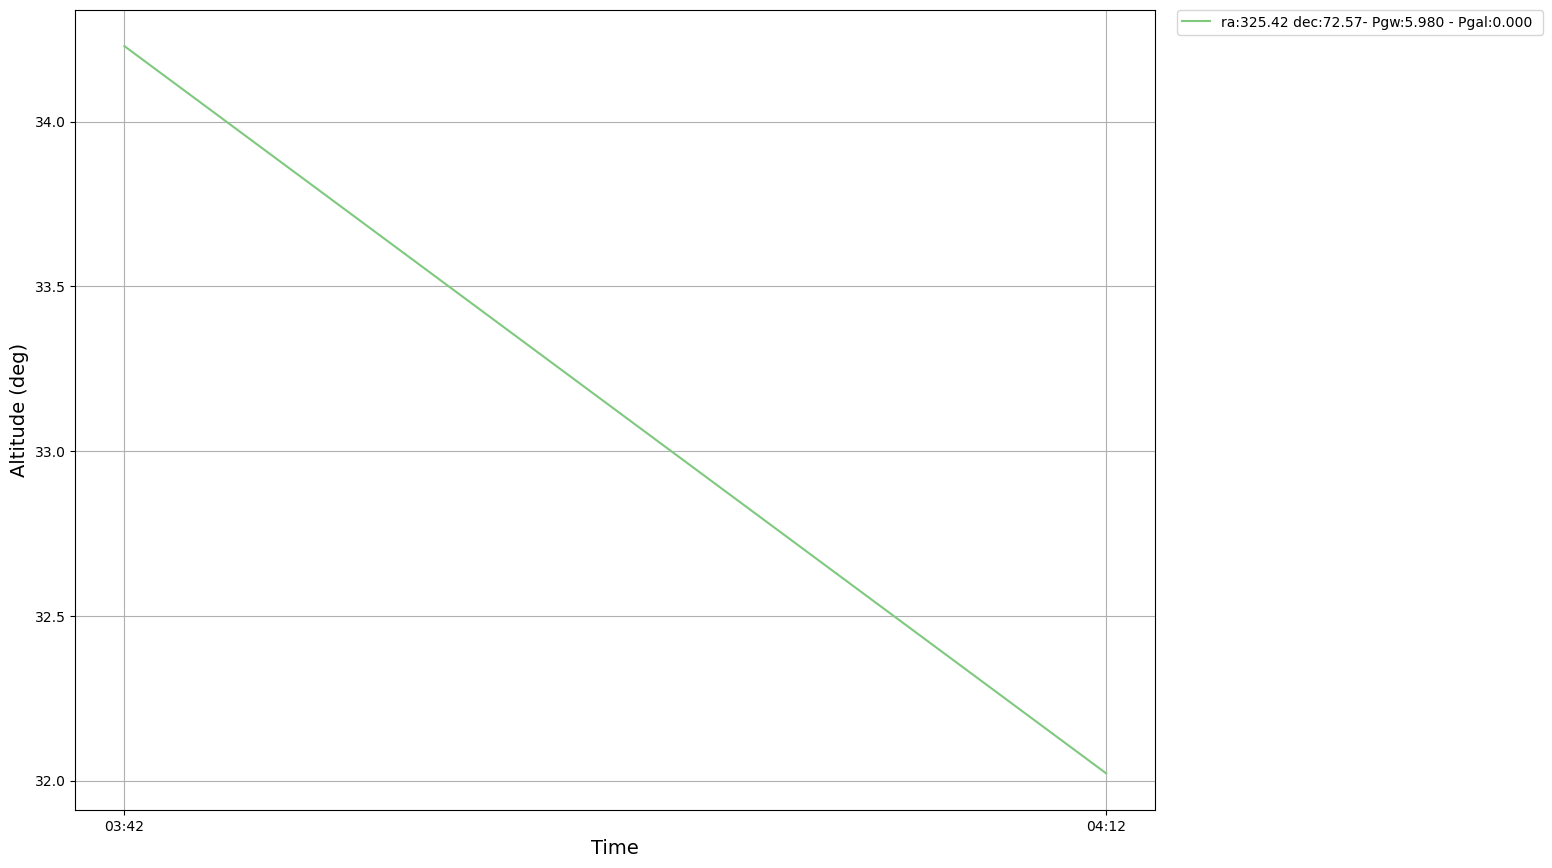

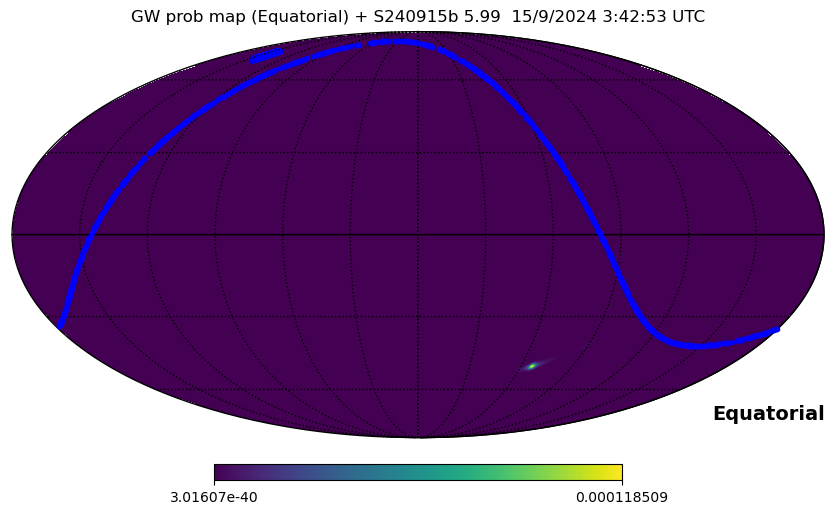

In [7]:
# Run the scheduler
GetSchedule(obspar)